# Task
this is my dataset
i have to increase the data set by 30% using an augmentation technique

Here is all the data you need:
"ChronicKidneyDisease_EHRs_from_AbuDhabi.csv"

## Data loading

### Subtask:
Load the "ChronicKidneyDisease_EHRs_from_AbuDhabi.csv" dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape to verify the loading.



In [9]:
import pandas as pd

try:
    df = pd.read_csv('ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'ChronicKidneyDisease_EHRs_from_AbuDhabi.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9


(491, 22)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify numerical and categorical features, and check for missing values and data types. Determine the appropriate augmentation techniques based on the data types of different columns.


**Reasoning**:
Examine data types, check for missing values, analyze numerical and categorical features, and determine the augmentation strategy based on the data characteristics. This involves using `.info()`, `.isnull().sum()`, `.describe()`, `.value_counts()`, and potentially visualizations to understand the data and guide augmentation strategy selection.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  CreatinineBaseline   491 non-null    float64
 15  eGFRBaseline         491 non-null    flo

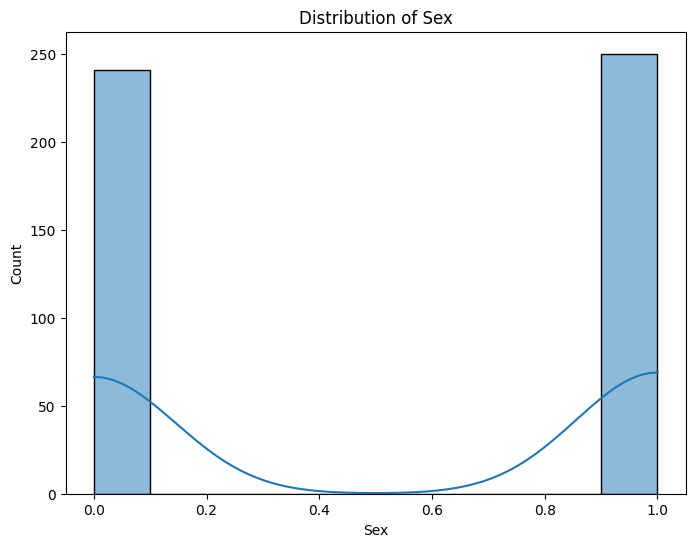

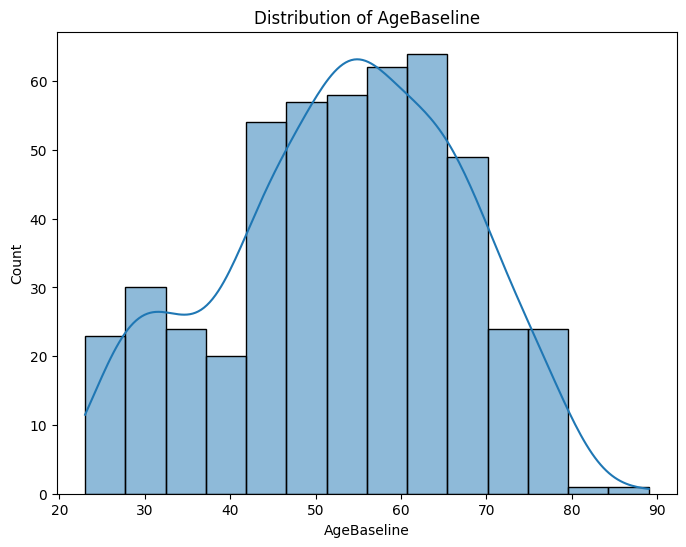

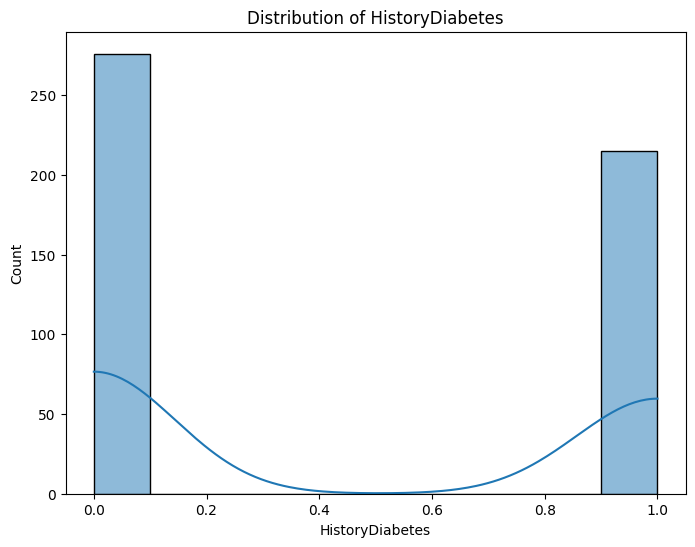

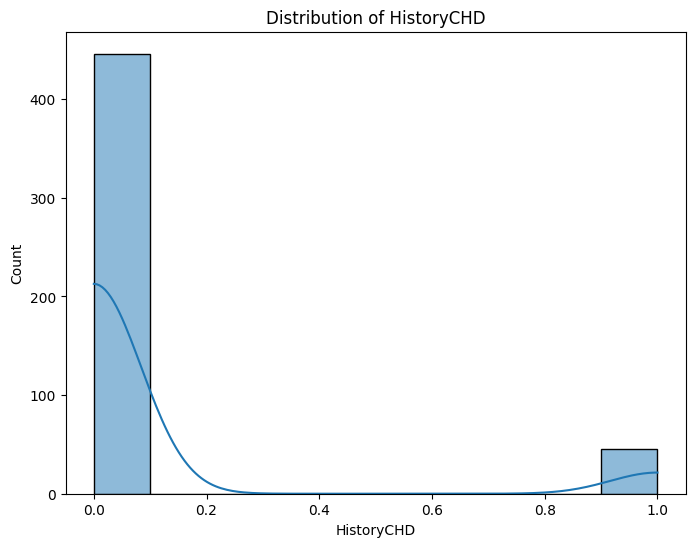

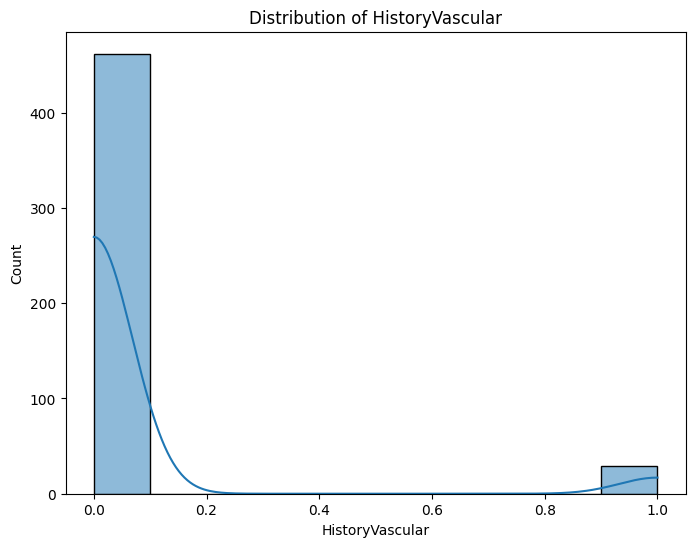

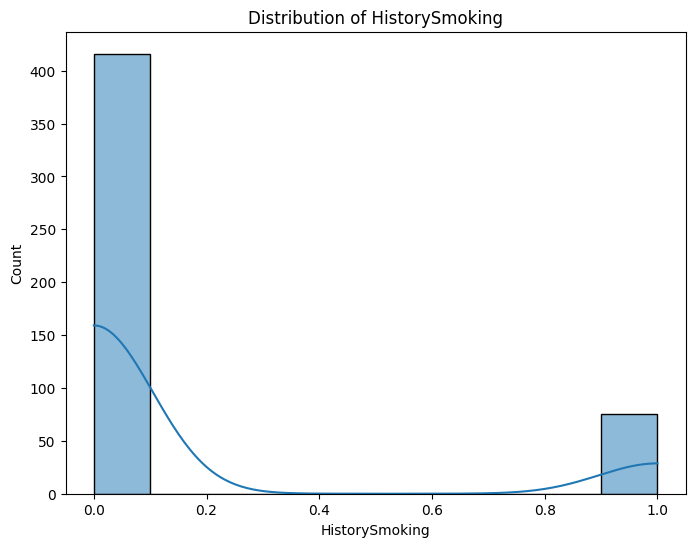

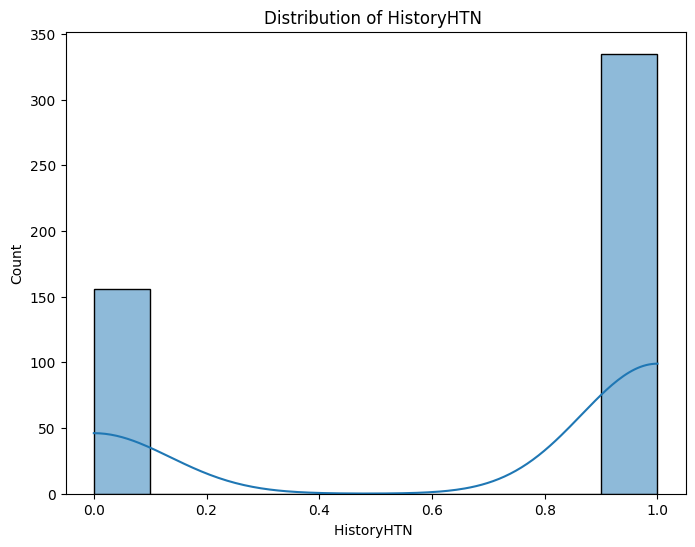

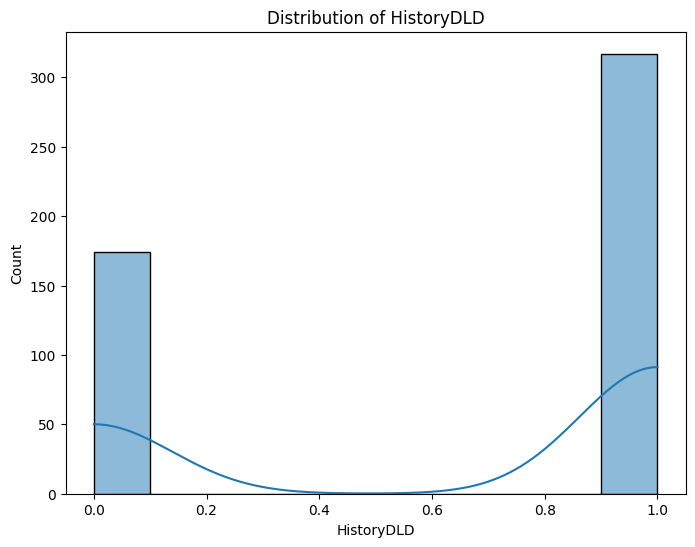

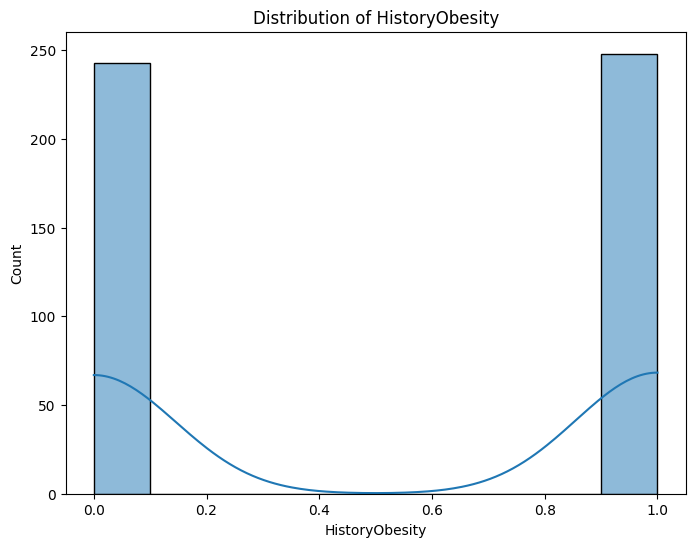

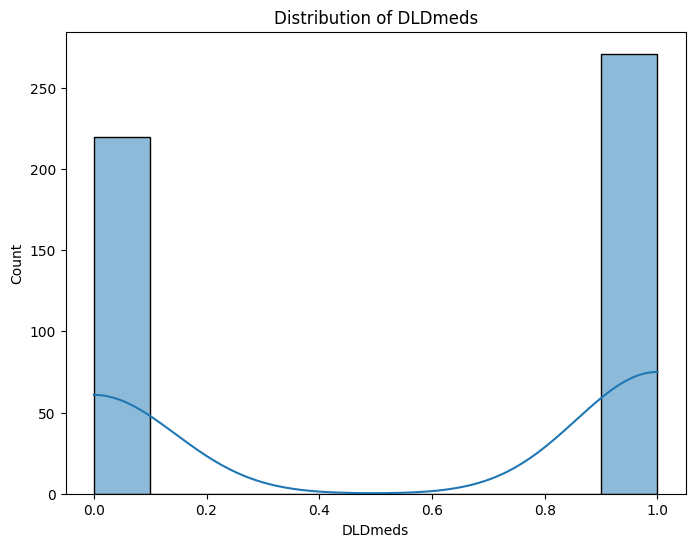

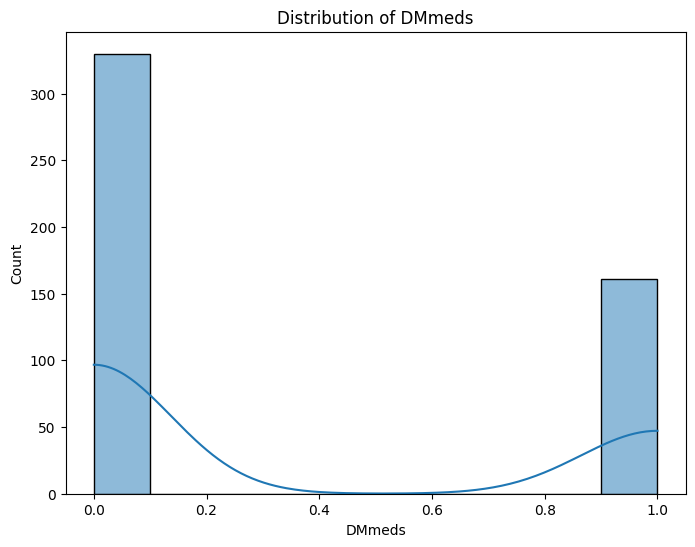

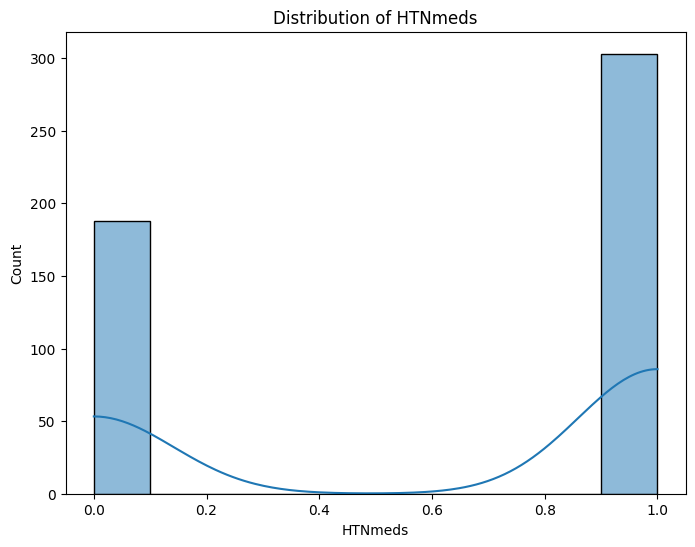

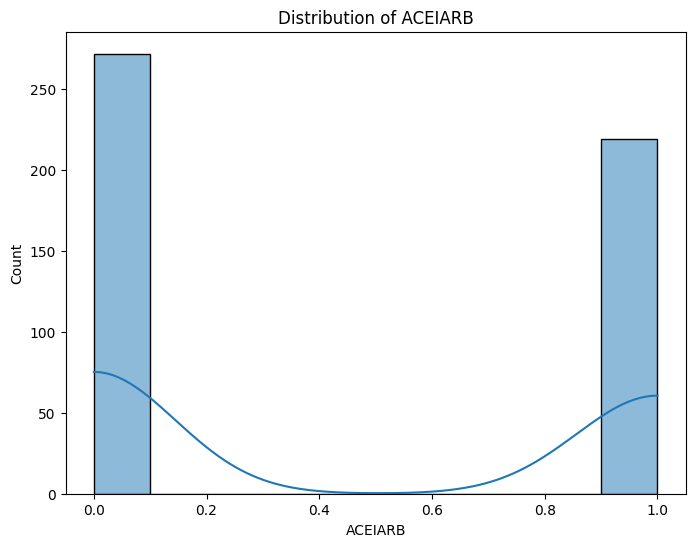

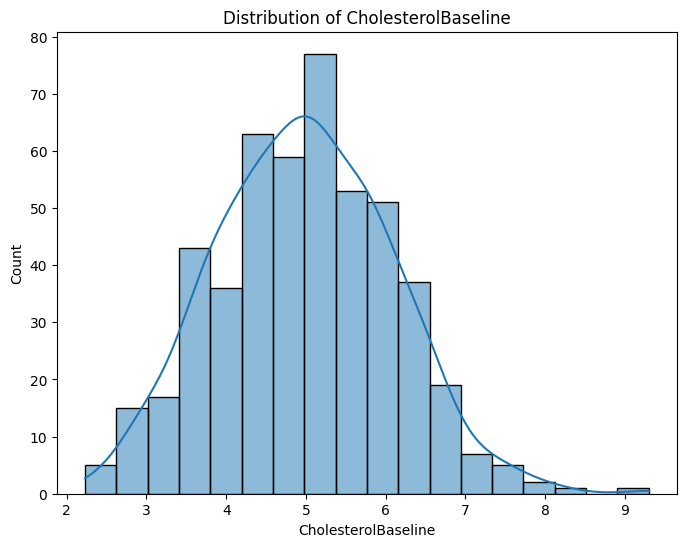

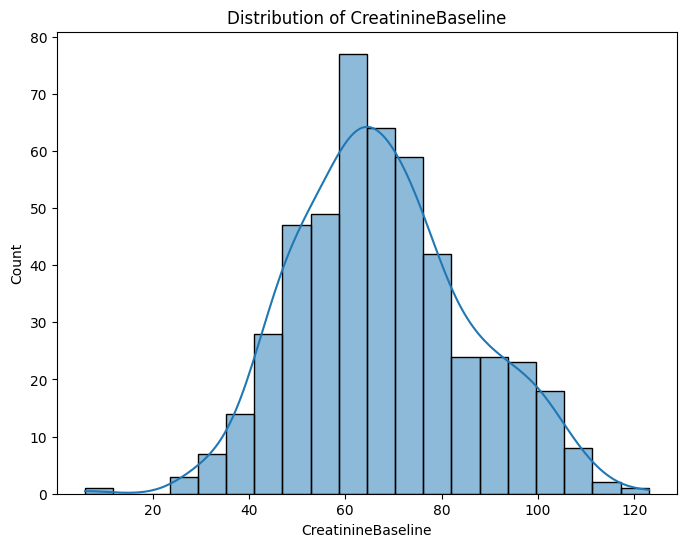

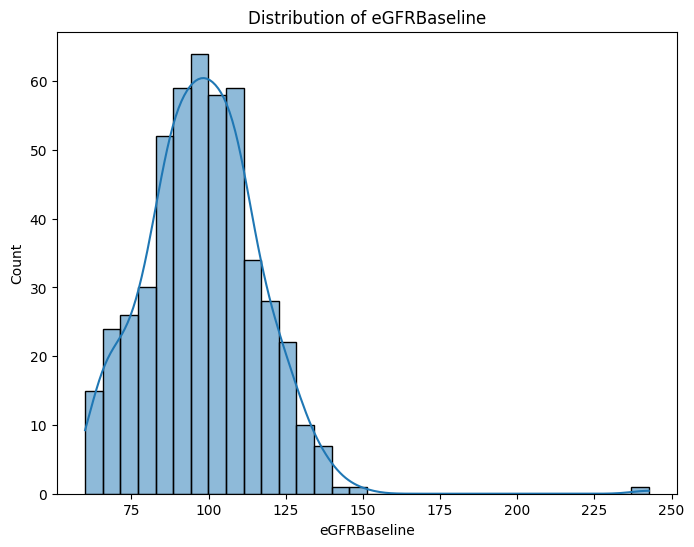

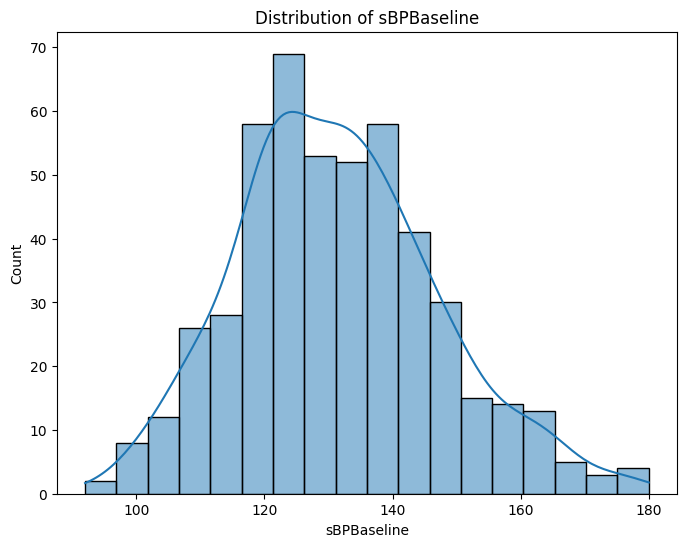

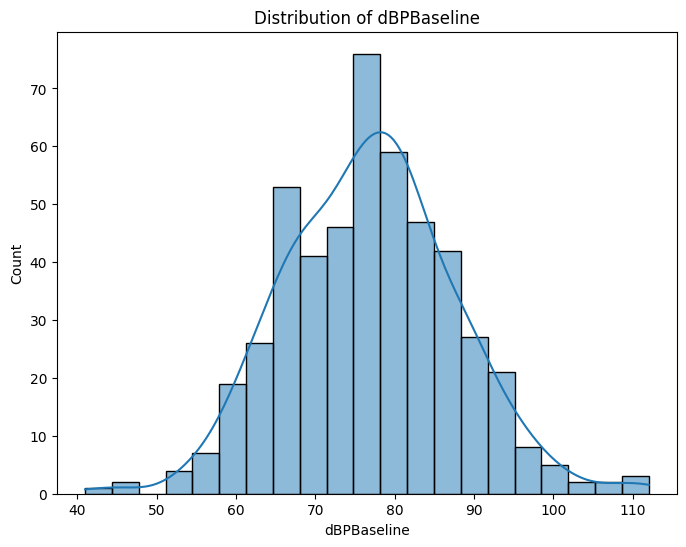

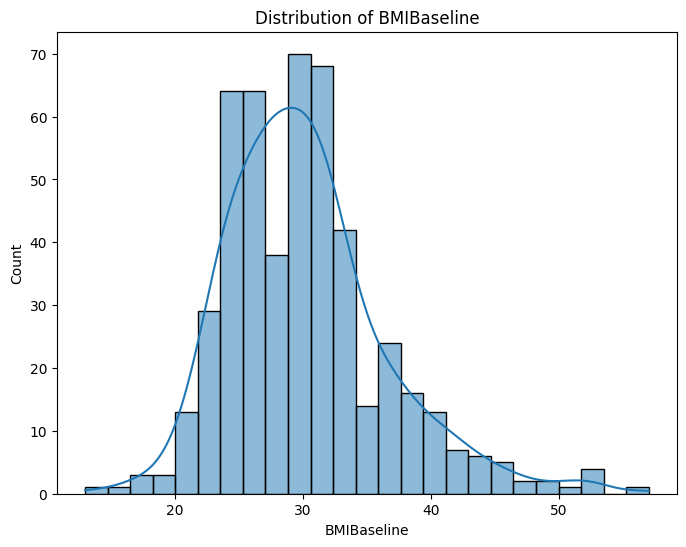

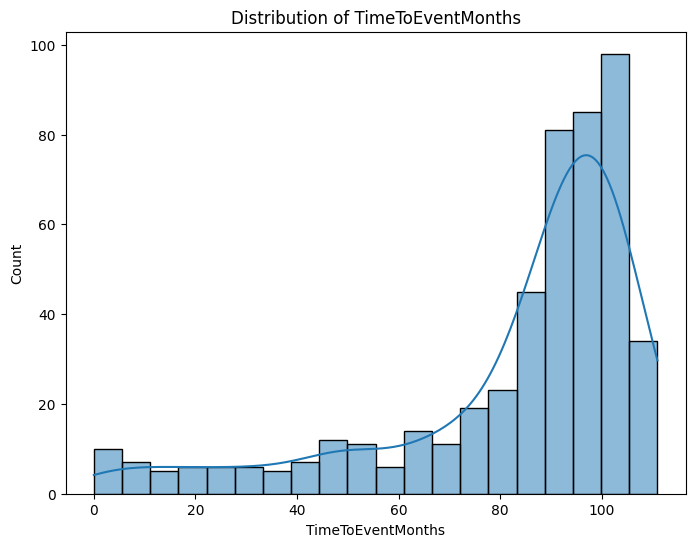

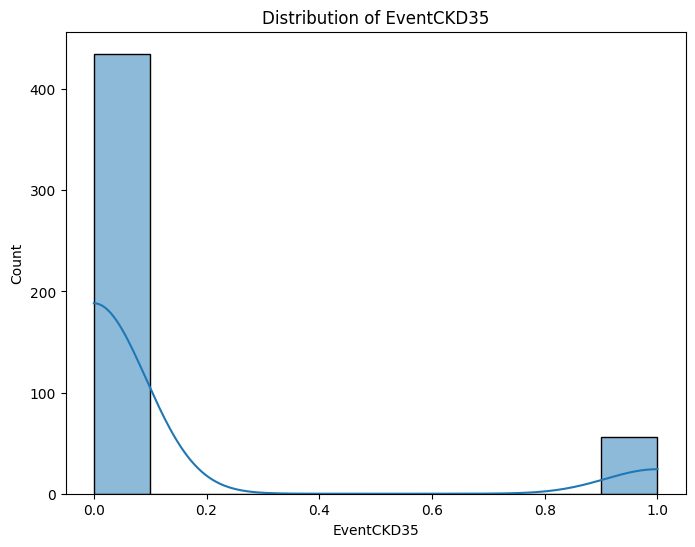

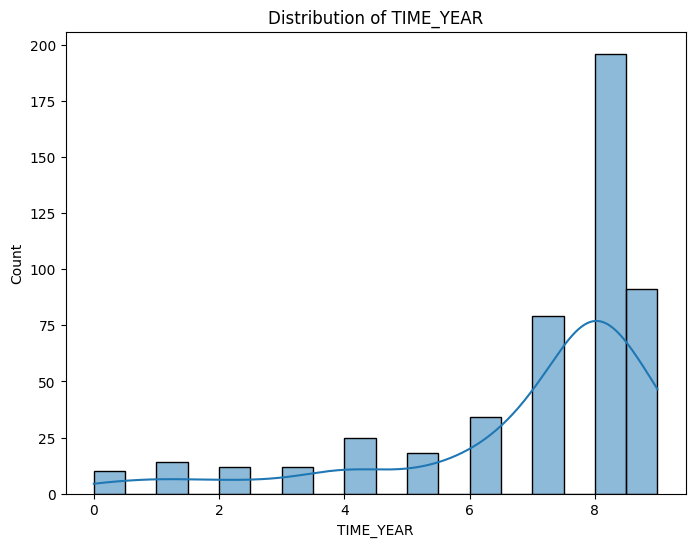


Value counts for categorical features:

Augmentation Strategy:
- Sex: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- AgeBaseline: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryDiabetes: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryCHD: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryVascular: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistorySmoking: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryHTN : Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryDLD: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- HistoryObesity: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.
- DLDmeds: Consider SMOTE or ADASYN, depending on the distr

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine data types and missing values
print(df.info())
print(df.isnull().sum())

# Analyze numerical features
numerical_features = df.select_dtypes(include=['number']).columns
print("\nDescriptive statistics for numerical features:")
print(df[numerical_features].describe())
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Analyze categorical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
print("\nValue counts for categorical features:")
for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Determine augmentation strategy (example - refine based on detailed analysis)
print("\nAugmentation Strategy:")
for col in df.columns:
    if col in numerical_features:
        print(f"- {col}: Consider SMOTE or ADASYN, depending on the distribution and presence of outliers.")
    elif col in categorical_features:
        print(f"- {col}: Consider random oversampling or a categorical SMOTE variant.")
    else:
        print(f"- {col}:  Needs further investigation.")

## Data preparation

### Subtask:
Prepare the data for augmentation by handling potential outliers in numerical features.


**Reasoning**:
I need to handle outliers in the numerical features of the dataframe `df`. I will use the IQR method to detect outliers and replace them with the upper and lower bounds.



In [11]:
import numpy as np

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

numerical_cols = ['AgeBaseline', 'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths', 'TIME_YEAR']
for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

df_prepared = df.copy()
display(df_prepared.head())

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40.0,98.0,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,43.5,106.0,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41.0,88.0,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32.0,103.0,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31.0,105.0,0,9


## Data augmentation

### Subtask:
Augment the dataset `df_prepared` by 30% using SMOTE.


**Reasoning**:
Augment the dataset `df_prepared` by 30% using SMOTE, and concatenate the original and augmented data.



In [12]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Assuming 'EventCKD35' is the target variable
X = df_prepared.drop('EventCKD35', axis=1)
y = df_prepared['EventCKD35']

# Determine the number of samples to generate
n_samples_to_generate = int(0.30 * len(df_prepared))

# Instantiate SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)  # You might need to adjust k_neighbors

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create the augmented dataset
df_augmented = pd.DataFrame(X_resampled, columns=X.columns)
df_augmented['EventCKD35'] = y_resampled


# Verify the size increase
original_size = len(df_prepared)
augmented_size = len(df_augmented)
size_increase_percentage = (augmented_size - original_size) / original_size * 100

print(f"Original dataset size: {original_size}")
print(f"Augmented dataset size: {augmented_size}")
print(f"Size increase percentage: {size_increase_percentage:.2f}%")

display(df_augmented.head())

Original dataset size: 491
Augmented dataset size: 870
Size increase percentage: 77.19%


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,TIME_YEAR,EventCKD35
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40.0,98.0,8,0
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,43.5,106.0,9,0
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41.0,88.0,7,0
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32.0,103.0,9,0
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31.0,105.0,9,0


## Data analysis

### Subtask:
Compare the original and augmented datasets to ensure the key characteristics are preserved.


**Reasoning**:
Compare descriptive statistics and visualize distributions of key numerical features in the original and augmented datasets.



Descriptive Statistics Comparison:
Original Dataset:


,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,53.203666,4.976029,67.865988,97.906517,131.313646,76.837067,30.015275,85.387984,7.083503
std,13.821282,1.088056,17.778753,17.411830,15.525338,10.468511,5.723499,20.278638,1.838131
min,23.000000,2.230000,19.750000,60.000000,92.000000,48.000000,15.500000,42.500000,3.000000
25%,44.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,6.000000
50%,54.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,8.000000
75%,64.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,8.000000
max,89.000000,8.125000,113.750000,144.150000,171.000000,104.000000,43.500000,111.000000,9.000000



Augmented Dataset:


,AgeBaseline,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,TIME_YEAR
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,56.671264,4.818741,74.263584,90.251733,133.586207,75.724138,30.123216,73.965469,5.924138
std,12.268758,1.019995,18.334596,17.528273,15.695793,10.642847,5.455242,23.749770,2.221092
min,23.000000,2.230000,19.750000,60.000000,92.000000,48.000000,15.500000,42.500000,3.000000
25%,51.000000,4.109230,61.399255,77.382989,122.000000,67.000000,26.000000,46.702529,3.000000
50%,57.000000,4.735061,74.025955,88.478327,133.000000,76.000000,30.000000,82.000000,7.000000
75%,65.000000,5.478709,88.000000,101.179341,144.000000,84.000000,33.000000,95.000000,8.000000
max,89.000000,8.125000,113.750000,144.150000,171.000000,104.000000,43.500000,111.000000,9.000000


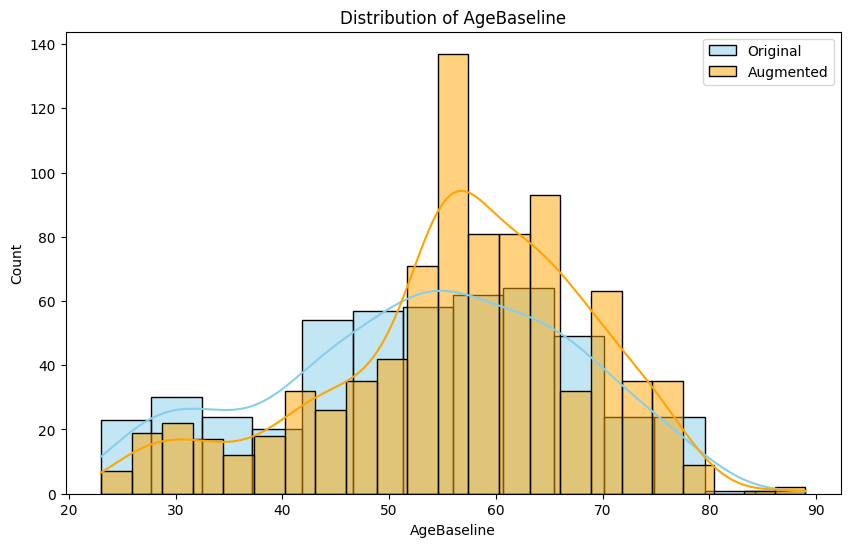

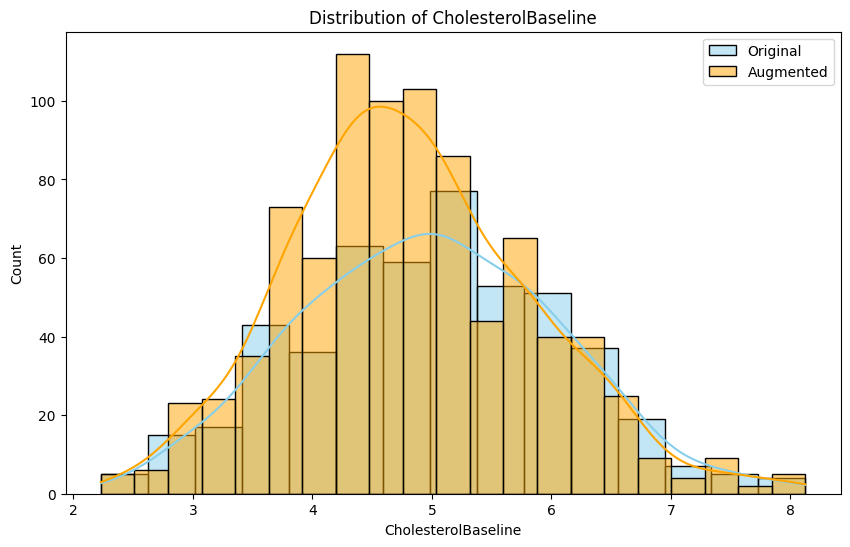

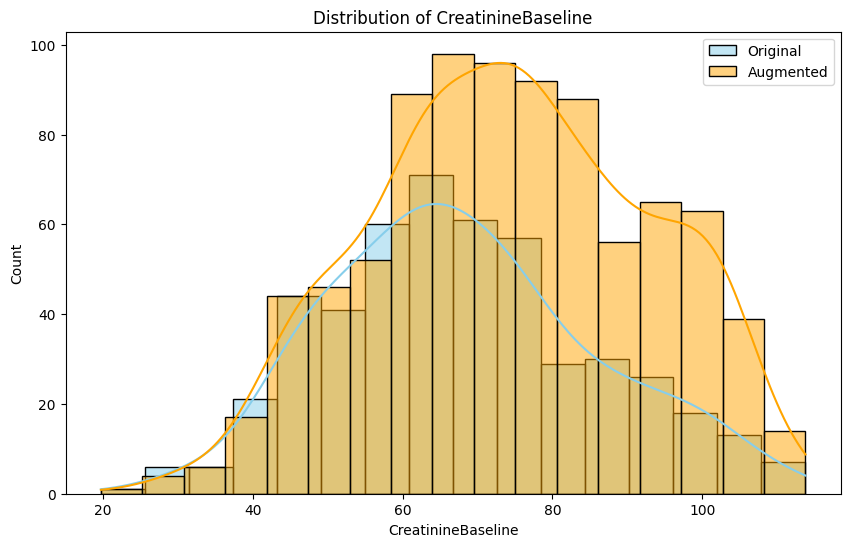

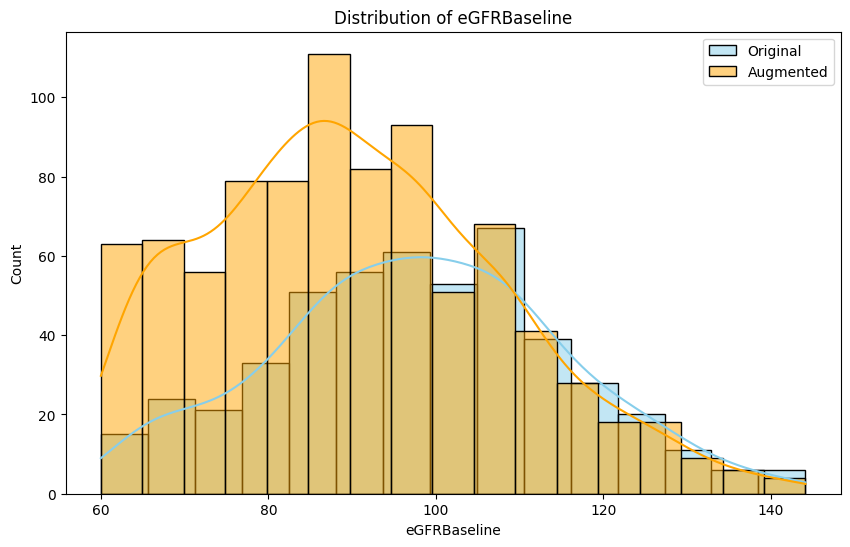

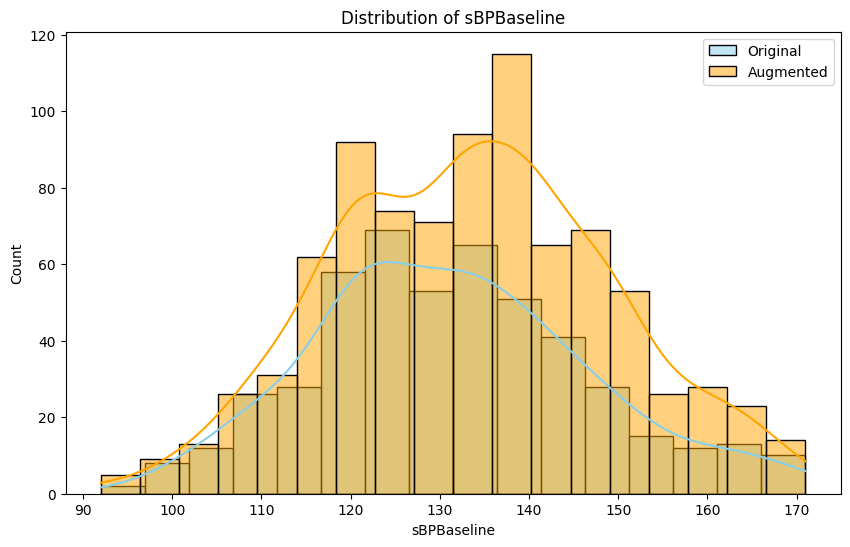

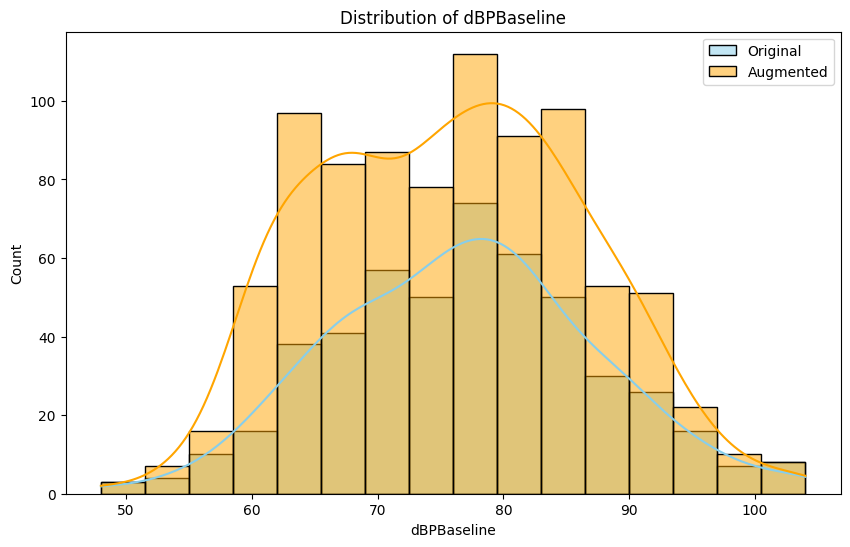

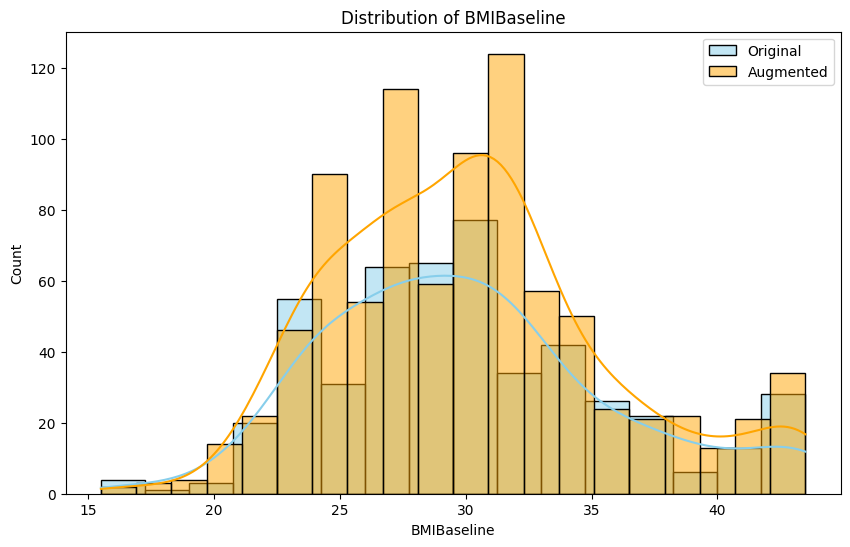

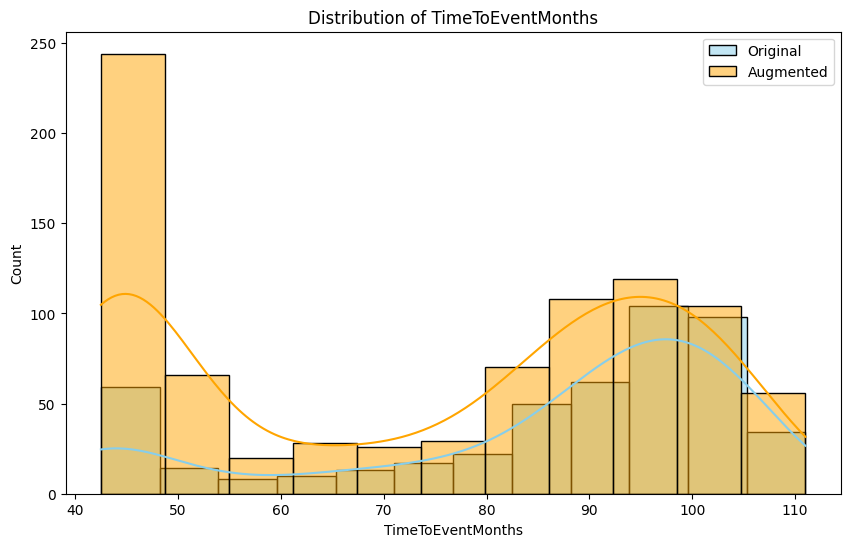

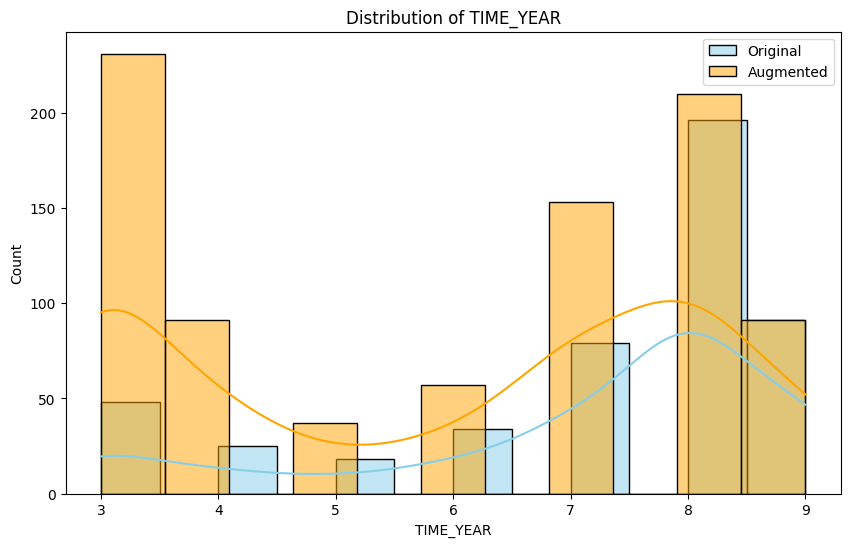

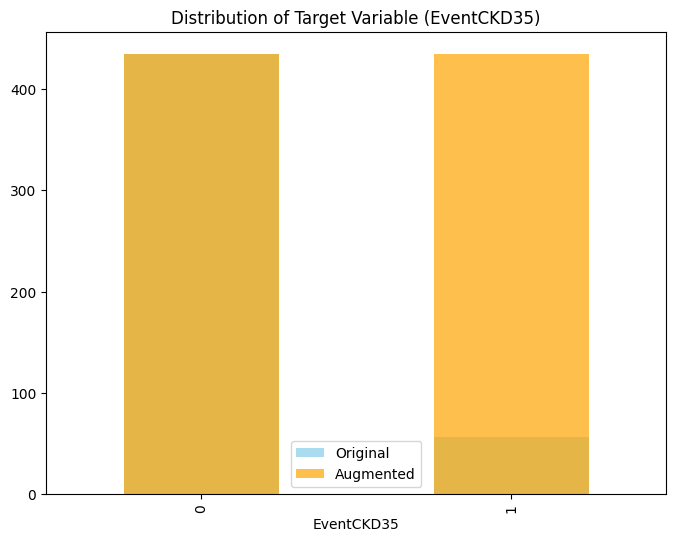


Target Variable Proportions:
Original: EventCKD35
0    0.885947
1    0.114053
Name: proportion, dtype: float64
Augmented: EventCKD35
0    0.5
1    0.5
Name: proportion, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features to compare
numerical_features = ['AgeBaseline', 'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths', 'TIME_YEAR']

# Descriptive statistics
print("Descriptive Statistics Comparison:")
print("Original Dataset:")
display(df_prepared[numerical_features].describe())
print("\nAugmented Dataset:")
display(df_augmented[numerical_features].describe())

# Visualize distributions
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_prepared[col], label='Original', kde=True, color='skyblue', alpha=0.5)
    sns.histplot(df_augmented[col], label='Augmented', kde=True, color='orange', alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

# Compare target variable distribution
plt.figure(figsize=(8, 6))
df_prepared['EventCKD35'].value_counts().plot(kind='bar', label='Original', color='skyblue', alpha=0.7)
df_augmented['EventCKD35'].value_counts().plot(kind='bar', label='Augmented', color='orange', alpha=0.7)
plt.title('Distribution of Target Variable (EventCKD35)')
plt.legend()
plt.show()

# Quantify the change in proportions of the target variable
original_proportions = df_prepared['EventCKD35'].value_counts(normalize=True)
augmented_proportions = df_augmented['EventCKD35'].value_counts(normalize=True)
print("\nTarget Variable Proportions:")
print("Original:", original_proportions)
print("Augmented:", augmented_proportions)

In [14]:
# Assuming df_prepared is the original dataset and df_augmented is the augmented dataset
df_combined = pd.concat([df_prepared, df_augmented], ignore_index=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_combined.drop('EventCKD35', axis=1)
y = df_combined['EventCKD35']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),  # Input layer
        tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
        tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer 3
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [17]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    scores.append(accuracy)

print(f"Average accuracy across 5 folds: {np.mean(scores):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Average accuracy across 5 folds: 0.9846


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

    accuracies.append(accuracy_score(y_test, y_pred_classes))
    precisions.append(precision_score(y_test, y_pred_classes))
    recalls.append(recall_score(y_test, y_pred_classes))
    f1_scores.append(f1_score(y_test, y_pred_classes))

# Print results in decimal format
print(f"Average accuracy across 5 folds: {np.mean(accuracies):.4f}")
print(f"Average precision across 5 folds: {np.mean(precisions):.4f}")
print(f"Average recall across 5 folds: {np.mean(recalls):.4f}")
print(f"Average F1 score across 5 folds: {np.mean(f1_scores):.4f}")

# Print results in percentage format
print(f"Average accuracy across 5 folds: {np.mean(accuracies) * 100:.2f}%")
print(f"Average precision across 5 folds: {np.mean(precisions) * 100:.2f}%")
print(f"Average recall across 5 folds: {np.mean(recalls) * 100:.2f}%")
print(f"Average F1 score across 5 folds: {np.mean(f1_scores) * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Average accuracy across 5 folds: 0.9816
Average precision across 5 folds: 0.9816
Average recall across 5 folds: 0.9671
Average F1 score across 5 folds: 0.9741
Average accuracy across 5 folds: 98.16%
Average precision across 5 folds: 98.16%
Average recall across 5 folds: 96.71%
Average F1 score across 5 folds: 97.41%


In [19]:
df_augmented.to_csv('augmented_data.csv', index=False)

In [20]:
from google.colab import files

files.download('augmented_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
for train_index, test_index in kfold.split(X):
    # ... (model training and evaluation)

    # Save the model
    model.save('trained_model.h5')

    # Download the model file
    from google.colab import files
    files.download('trained_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model (1).h5


In [28]:
from tensorflow import keras

model = keras.models.load_model('model.h5')

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('model.h5')

# Load the augmented data
augmented_data = pd.read_csv('augmented_data.csv')

# Preprocess the data (same as during training)
X_augmented = augmented_data.drop('EventCKD35', axis=1)  # Assuming 'EventCKD35' is the target column
scaler = StandardScaler()
X_augmented = scaler.fit_transform(X_augmented)

# Make predictions
predictions = model.predict(X_augmented)

# Convert predictions to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Add predicted classes to the augmented data DataFrame
augmented_data['Predicted_EventCKD35'] = predicted_classes

# Save the augmented data with predictions
augmented_data.to_csv('augmented_data_with_predictions.csv', index=False)

print("Predictions saved to augmented_data_with_predictions.csv")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predictions saved to augmented_data_with_predictions.csv


MLP model for classification

In [30]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_mlp_model(input_shape):
    """Creates an MLP model for classification."""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),  # Input layer with 128 units
        tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ... (Data loading, preprocessing, and augmentation remain the same) ...

# Assuming X is the preprocessed data and y is the target variable
input_shape = X.shape[1:]  # Get the shape of the input features

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_mlp_model(input_shape)  # Create the MLP model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    accuracies.append(accuracy_score(y_test, y_pred_classes))
    precisions.append(precision_score(y_test, y_pred_classes))
    recalls.append(recall_score(y_test, y_pred_classes))
    f1_scores.append(f1_score(y_test, y_pred_classes))

# ... (Print results and save the model as before) ...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


1D CNN model for classification

In [33]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_cnn1d_model(input_shape):
    """Creates a 1D CNN model for classification."""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape[0], 1), input_shape=input_shape),  # Reshape for CNN
        tf.keras.layers.Conv1D(32, 3, activation='relu'),  # Convolutional layer
        tf.keras.layers.MaxPooling1D(2),  # Max pooling layer
        tf.keras.layers.Flatten(),  # Flatten for dense layers
        tf.keras.layers.Dense(64, activation='relu'),  # Dense layer
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ... (Data loading, preprocessing, and augmentation remain the same) ...

# Assuming X is the preprocessed data and y is the target variable
input_shape = X.shape[1:]  # Get the shape of the input features

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cnn1d_accuracies = []
cnn1d_precisions = []
cnn1d_recalls = []
cnn1d_f1_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_cnn1d_model(input_shape)  # Create the CNN1D model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    cnn1d_accuracies.append(accuracy_score(y_test, y_pred_classes))
    cnn1d_precisions.append(precision_score(y_test, y_pred_classes))
    cnn1d_recalls.append(recall_score(y_test, y_pred_classes))
    cnn1d_f1_scores.append(f1_score(y_test, y_pred_classes))

# Print results for CNN1D
print("CNN1D Results:")
print(f"Average accuracy across 5 folds: {np.mean(cnn1d_accuracies):.4f}")
print(f"Average precision across 5 folds: {np.mean(cnn1d_precisions):.4f}")
print(f"Average recall across 5 folds: {np.mean(cnn1d_recalls):.4f}")
print(f"Average F1 score across 5 folds: {np.mean(cnn1d_f1_scores):.4f}")
# Print results in percentage format
print(f"Average accuracy across 5 folds: {np.mean(accuracies) * 100:.2f}%")
print(f"Average precision across 5 folds: {np.mean(precisions) * 100:.2f}%")
print(f"Average recall across 5 folds: {np.mean(recalls) * 100:.2f}%")
print(f"Average F1 score across 5 folds: {np.mean(f1_scores) * 100:.2f}%")
# ... (You can compare these results with the MLP results) ...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CNN1D Results:
Average accuracy across 5 folds: 0.9111
Average precision across 5 folds: 0.8689
Average recall across 5 folds: 0.8919
Average F1 score across 5 folds: 0.8789
Average accuracy across 5 folds: 97.72%
Average precision across 5 folds: 95.44%
Average recall across 5 folds: 98.36%
Average F1 score across 5 folds: 96.88%
